# Carregar bibliotecas

In [1]:
  from __future__ import absolute_import, division, print_function, unicode_literals
  import pathlib

  import pandas as pd 
  # O pandas é uma biblioteca de código aberto que fornece estruturas de dados de 
  # alto desempenho e fáceis de usar e ferramentas de análise

  import io           
  # entrada e saída. 
  # O módulo io fornece as interfaces Python para o fluxo de manipulação.

  import matplotlib.pyplot as plt 
  # O Matplotlib é uma biblioteca de plotagem 2D do Python
  # mais detalhes em: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html

  !pip install -q seaborn
  import seaborn as sns
  # Seaborn é uma biblioteca de visualização de dados Python baseada no matplotlib. 
  # Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.

  from sklearn import preprocessing 
  from sklearn.preprocessing import MinMaxScaler
  # Ferramentas simples e eficientes para mineração e análise de dados

  import tensorflow as tf
  from tensorflow import keras
  from tensorflow.keras import layers

  from keras.models import Sequential
  from keras.layers import Dense, Activation


Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataR2.xlsx to dataR2.xlsx


# Carregar dados

* O passo seguinte, você pode carregar os seus dados a partir dos arquivos que fez upload:

In [0]:
dataset = pd.read_excel(io.BytesIO(uploaded['dataR2.xlsx']))

* Você também pode ler dados com extensão csv

  dataset = pd.read_csv('NomeDoArquivo.csv')

  Mais informações em [link text](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

# Visualizar dados


In [4]:
dataset

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


# Tipo de dados

Você pode ver os tipos das variáveis que acabou de carregar.

Mais informações em: [link text](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [5]:
dataset.dtypes


Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

# Limpar dados

Muitas vezes é necessário limpar os dados. Vamos verificar se existem dados incompletos na nossa Tabela.

In [6]:
dataset.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

Neste caso, não temos nenhum dado faltando. Se tivesse poderíamos eliminá-los com o código:

dataset = dataset.dropna()

Assim  como fizemos no Orange, podemos plotar estatísticas dos nossos dados.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7bb7f6400>,
      dtype=object)

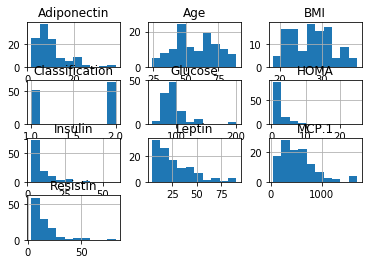

In [7]:
dataset.hist()


# Plotar gráficos

https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

Exemplo de código: 

plt.show()


# Como separar Linhas



No nosso exemplo, vamos deixar no dataset somente os dados de São José dos Campos

In [0]:
datasetCLass = dataset.loc[(dataset.Classification == 2)]


Mais detalhes em [link text](https://datatofish.com/select-rows-pandas-dataframe/)

In [0]:
datasetCLass

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2
54,49,20.956607,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


# Selecionar Colunas

In [0]:
datasetSel = dataset[['Classification','Age']]

In [0]:
datasetSel

,Classification,Age
0,1,48
1,1,83
2,1,82
3,1,68
4,1,86
...,...,...
111,2,45
112,2,62
113,2,65
114,2,72


# Separando dados de treinamento e teste

Agora separe os dados em um conjunto de treinamento e outro teste.

Iremos utilizar o de conjunto de teste no final da análise do model.

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)


Você pode escolher a quantidade de dados que vai utilizar, escolhendo a porcentagem, número de elementos, etc. 

Mais detalhes do "dataset.sample" em [link text](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)

Mais detalhes do "dataset.drop" em [link text](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)



In [11]:
train_dataset

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
10,34,21.470000,78,3.469,0.667436,14.5700,13.110000,6.92000,354.600,1
74,46,22.210000,86,36.940,7.836205,10.1600,9.760000,5.68000,312.000,2
66,54,24.218750,86,3.730,0.791257,8.6874,3.705230,10.34455,635.049,2
51,77,25.900000,85,4.580,0.960273,13.7400,9.753260,11.77400,488.829,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
...,...,...,...,...,...,...,...,...,...,...
20,36,28.576676,86,4.345,0.921719,15.1248,8.600000,9.15390,534.224,1
109,75,30.480000,152,7.010,2.628283,50.5300,10.060000,11.73000,99.450,2
72,51,18.370000,105,6.030,1.561770,9.6200,12.760000,3.21000,513.660,2
77,43,31.250000,103,4.328,1.099601,25.7816,12.718960,38.65310,775.322,2


In [12]:
test_dataset

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1
12,25,22.860000,82,4.090,0.827271,20.4500,23.670000,5.14000,313.730,1
21,34,31.975015,87,4.530,0.972138,28.7502,7.642760,5.62592,572.783,1
36,66,31.238590,82,4.181,0.845677,16.2247,4.267105,3.29175,634.602,1
37,69,35.092702,101,5.646,1.406607,83.4821,6.796985,82.10000,263.499,1
39,77,35.587929,76,3.881,0.727558,21.7863,8.125550,17.26150,618.272,1
44,71,30.300000,102,8.340,2.098344,56.5020,8.130000,4.29890,200.976,1
46,75,25.700000,94,8.079,1.873251,65.9260,3.741220,4.49685,206.802,1
47,78,25.300000,60,3.508,0.519184,6.6330,10.567295,4.66380,209.749,1
58,51,19.132653,93,4.364,1.001102,11.0816,5.807620,5.57055,90.600,2


Observem que existem 2530 amostras de treinamento e 633 amostras para teste.

Como discutido nas aulas anteriores, é necessário normalizar ou padronizar os dados. 

# Normalização ou Padronizar os dados

In [0]:
train_stats = train_dataset.describe()
#train_stats.pop("EQUIPES_")
train_stats = train_stats.transpose()
train_stats

def norm(x):
 # return (x - train_stats['mean']) / train_stats['std']
 return (x) / train_stats['max']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

é possível normalizar os dados utilizando o Sklearn

* names = datasetSel.columns
* scaler = MinMaxScaler()
* scaler.fit(datasetSel)
* print(scaler.data_max_)
* print(scaler.transform(datasetSel))
* print(scaler.transform([[2, 2]]))
* NormdatasetSel=scaler.transform(datasetSel)


Após o processamento é necessário denormalizar os dados

scaler.inverse_transform(NormdatasetSel)

Mais detalhes em: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)



In [14]:
normed_train_data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
10,0.382022,0.556524,0.388060,0.059340,0.032352,0.161387,0.344637,0.128932,0.208780,0.5
74,0.516854,0.575705,0.427861,0.631885,0.379832,0.112539,0.256572,0.105829,0.183698,1.0
66,0.606742,0.627774,0.427861,0.063804,0.038353,0.096227,0.097404,0.192738,0.373901,1.0
51,0.865169,0.671354,0.422886,0.078344,0.046546,0.152193,0.256395,0.219371,0.287811,0.5
7,0.853933,0.616920,0.587065,0.110674,0.091281,0.047751,0.348352,0.095100,0.165266,0.5
...,...,...,...,...,...,...,...,...,...,...
20,0.404494,0.740736,0.427861,0.074324,0.044677,0.167532,0.226078,0.170554,0.314538,0.5
109,0.842697,0.790072,0.756219,0.119911,0.127396,0.559703,0.264458,0.218551,0.058554,1.0
72,0.573034,0.476169,0.522388,0.103147,0.075701,0.106557,0.335436,0.059808,0.302430,1.0
77,0.483146,0.810031,0.512438,0.074034,0.053299,0.285574,0.334358,0.720177,0.456491,1.0


In [15]:
normed_test_data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
9,0.842697,0.596183,0.412935,0.084707,0.049142,0.189710,0.304390,0.132124,0.187408,0.5
12,0.280899,0.592554,0.407960,0.069962,0.040099,0.226518,0.622240,0.095767,0.184717,0.5
21,0.382022,0.828824,0.432836,0.077489,0.047121,0.318456,0.200914,0.104821,0.337241,0.5
36,0.741573,0.809735,0.407960,0.071519,0.040991,0.179715,0.112174,0.061331,0.373638,0.5
37,0.775281,0.909638,0.502488,0.096579,0.068180,0.924702,0.178680,1.529670,0.155142,0.5
39,0.865169,0.922475,0.378109,0.066387,0.035266,0.241319,0.213605,0.321613,0.364023,0.5
44,0.797753,0.785406,0.507463,0.142662,0.101710,0.625853,0.213722,0.080096,0.118330,0.5
46,0.842697,0.666170,0.467662,0.138197,0.090799,0.730239,0.098350,0.083784,0.121760,0.5
47,0.876404,0.655801,0.298507,0.060007,0.025166,0.073471,0.277794,0.086895,0.123495,0.5
58,0.573034,0.495938,0.462687,0.074649,0.048525,0.122747,0.152671,0.103789,0.053343,1.0


# Separando entradas e Saídas

Separe o valor alvo (labels), das features. Essa label é o valor no qual o modelo é treinado para prever.

In [0]:
train_labels = normed_train_data.pop('Classification')
test_labels = normed_test_data.pop('Classification')



---


# ATÉ AQUI PREPARAMOS OS DADOS


# Agora vamos para a Rede Neural Artificial

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.sigmoid, input_shape=[len(train_dataset.keys())-1]),
    layers.Dense(32, activation=tf.nn.relu),
    #layers.Dense(16, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.02)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [18]:
model = build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [19]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
495,0.035972,0.149251,0.035972,0.050858,0.199063,0.050858,495
496,0.033978,0.150108,0.033978,0.049030,0.198342,0.049030,496
497,0.035727,0.155478,0.035727,0.055019,0.210717,0.055019,497
498,0.033863,0.150352,0.033863,0.049541,0.182934,0.049541,498
499,0.038609,0.158052,0.038609,0.060229,0.215021,0.060229,499


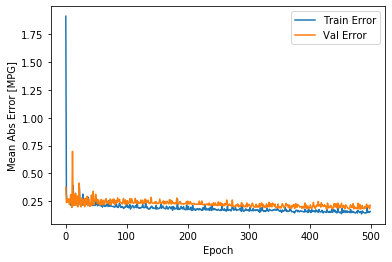

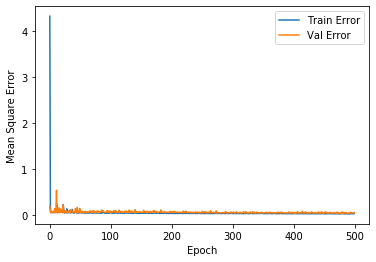

In [21]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


......................

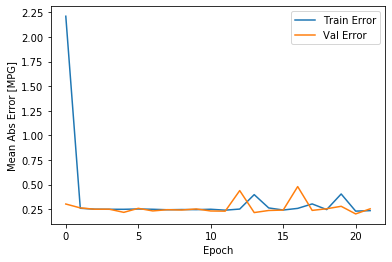

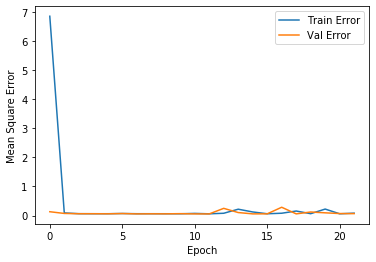

In [22]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

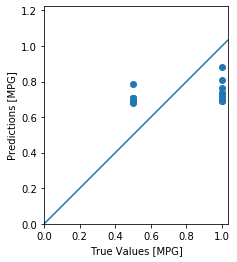

In [24]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

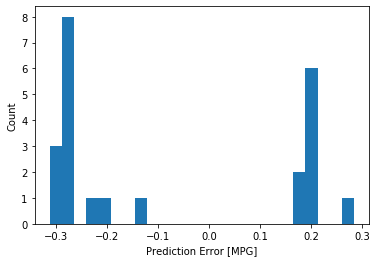

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")